## Data Understanding

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime


%matplotlib inline

In [4]:
 df = pd.read_json('data/train_new.json')

In [5]:
df.shape

(14337, 44)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14337 entries, 0 to 14336
Data columns (total 44 columns):
acct_type             14337 non-null object
approx_payout_date    14337 non-null int64
body_length           14337 non-null int64
channels              14337 non-null int64
country               14256 non-null object
currency              14337 non-null object
delivery_method       14321 non-null float64
description           14337 non-null object
email_domain          14337 non-null object
event_created         14337 non-null int64
event_end             14337 non-null int64
event_published       14238 non-null float64
event_start           14337 non-null int64
fb_published          14337 non-null int64
gts                   14337 non-null float64
has_analytics         14337 non-null int64
has_header            8928 non-null float64
has_logo              14337 non-null int64
listed                14337 non-null object
name                  14337 non-null object
name_length      

In [7]:
df.acct_type.value_counts(dropna=False)

premium             12373
fraudster_event       851
fraudster             437
spammer_limited       218
spammer_warn          144
tos_warn               91
spammer_noinvite       84
tos_lock               77
locked                 54
fraudster_att           5
spammer_web             2
spammer                 1
Name: acct_type, dtype: int64

## Data Prep

In [8]:
y = df['acct_type']!='premium'
print y[0:5]

0     True
1    False
2    False
3    False
4    False
Name: acct_type, dtype: bool


In [9]:
clean_df=pd.DataFrame()

In [10]:
clean_df['log_desc_length'] = np.log(df['body_length']+1)
clean_df['bin_desc_length'] = [0 if i == 0 else 1 for i in df['body_length']]
clean_df['bin_desc_length'] = clean_df['bin_desc_length'].astype('category')

In [11]:
clean_df['channels'] = df['channels'].astype('category')
clean_df['bin_channels'] = [0 if i ==0 else 1 for i in df['channels']]
clean_df['bin_channels'] = clean_df['bin_channels'].astype('category')
clean_df['bin_country'] = [1 if i=='US' else 0 for i in df['country']]
clean_df['bin_country'] = clean_df['bin_country'].astype('category')

In [12]:
clean_df['delivery_method'] = df['delivery_method'].fillna(-1)
clean_df['delivery_method'] = [int(i) for i in clean_df['delivery_method']]
clean_df['delivery_method'] = clean_df['delivery_method'].astype('category')

In [13]:
clean_df['email_suffix'] = df['email_domain'].map(lambda x: x.split('.')[-1])
clean_df['email_suffix'] = clean_df['email_suffix'].astype('category')
email_top = ['gmail.com', 'yahoo.com', 'hotmail.com', 'aol.com']
clean_df['email_top'] = df['email_domain']
clean_df['email_top'] = [0 if i not in email_top else i for i in clean_df['email_top']]
clean_df['email_top'] = clean_df['email_top'].astype('category')

In [14]:
clean_df['fb_published'] = df['fb_published'].astype('bool')
clean_df['log_gts'] = np.log(df['gts']+1)

In [15]:
clean_df['bin_has_analytics'] = df['has_analytics'].fillna(-1)
clean_df['bin_has_analytics'] = clean_df['bin_has_analytics'].astype('category')

In [16]:
clean_df['bin_has_header'] = df['has_header'].fillna(-1)
clean_df['bin_has_header'] = clean_df['bin_has_header'].astype('category')

In [17]:
clean_df['bin_has_logo'] = df['has_logo'].fillna(-1)
clean_df['bin_has_logo'] = clean_df['bin_has_logo'].astype('category')

In [18]:
clean_df['listed'] = df['listed'].copy()

In [19]:
clean_df['log_num_orders'] = np.log(df['num_order']+1)

In [20]:
clean_df['bin_num_orders'] = [0 if i<10 else 1 for i in df['num_order']]
clean_df['bin_num_orders'] = clean_df['bin_num_orders'].astype('category')

In [21]:
clean_df['name_length'] = df['name_length'].copy()
clean_df['log_num_payouts'] = np.log(df['num_payouts']+1)

In [22]:
clean_df['org_fb'] = df['org_facebook'].fillna(-1).astype('category')
clean_df['org_twitter'] = df['org_twitter'].fillna(-1).astype('category')

In [23]:
clean_df['bin_payee_name'] = df['payee_name'].fillna(-1)
clean_df['bin_payee_name'] = [0 if i==-1 else 1 for i in clean_df['bin_payee_name']]
clean_df['bin_payee_name'] = clean_df['bin_payee_name'].astype('category')

In [24]:
clean_df['payout_type'] = df['payout_type'].fillna(-1)
clean_df['payout_type'] = clean_df['payout_type'].astype('category')

In [25]:
clean_df['show_map'] = df['show_map'].copy()

In [26]:
lst = []
for i in df['ticket_types']:
    dic = []
    for n in i:
        dic.append([int(n['cost'])* int(n['quantity_sold'])])
    lst.append(np.sum(dic))

In [27]:
clean_df['ticket_revenue'] = pd.DataFrame(lst)
clean_df['previous_ticket_offers'] = [len(i) for i in df['ticket_types']]

In [28]:
lst = []
for i in df['ticket_types']:
    dic = []
    for n in i:
        dic.append([float(n['quantity_sold'])/ float(n['quantity_total']+1)])
    if len(dic) == 0:
        lst.append(0)
    else:
        lst.append(np.mean(dic))

In [29]:
clean_df['ticket_prev_sold_ratio'] = pd.DataFrame(lst)

In [30]:
user_age_bin = [0,13, 242, 603, 3794]
age_cut = pd.cut(df['user_age'], user_age_bin, right=True, include_lowest=True)
clean_df['bin_user_age'] = age_cut

In [31]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14337 entries, 0 to 14336
Data columns (total 27 columns):
log_desc_length           14337 non-null float64
bin_desc_length           14337 non-null category
channels                  14337 non-null category
bin_channels              14337 non-null category
bin_country               14337 non-null category
delivery_method           14337 non-null category
email_suffix              14337 non-null category
email_top                 14337 non-null category
fb_published              14337 non-null bool
log_gts                   14337 non-null float64
bin_has_analytics         14337 non-null category
bin_has_header            14337 non-null category
bin_has_logo              14337 non-null category
listed                    14337 non-null object
log_num_orders            14337 non-null float64
bin_num_orders            14337 non-null category
name_length               14337 non-null int64
log_num_payouts           14337 non-null float64
org_

In [32]:
clean_df.head().T

,0,1,2,3,4
log_desc_length,8.25661,8.16052,7.86404,9.42125,7.7907
bin_desc_length,1,1,1,1,1
channels,5,0,8,6,11
bin_channels,1,0,1,1,1
bin_country,1,1,1,0,1
delivery_method,0,1,1,1,0
email_suffix,com,org,us,com,org
email_top,gmail.com,0,0,0,0
fb_published,False,False,False,False,True
log_gts,0,6.76737,8.1608,7.06335,7.7468


In [33]:
from bs4 import BeautifulSoup
from string import punctuation, ascii_letters

def process_text_field(raw_text):
    '''
    text: string
    OUTPUT: boolean, int, int, float (is blank, length, word count, punctuation_rate)
    '''
    text = BeautifulSoup(raw_text, 'lxml').text
    length = len(text)
    is_blank = length <= 1

    word_count = 0
    last_char = False
    for c in text:
        if c in ascii_letters:
            if last_char==False:
                word_count += 1
                last_char=True
        else:
            last_char = False
    
    punct_count = 0
    for c in text:
        if c in punctuation:
            punct_count += 1
    punctuation_rate = punct_count / float(length+1)
    
    return is_blank, length, word_count, punctuation_rate

def process_text_column(df, fieldname):
    is_blank_list = []
    length_list = []
    word_count_list = []
    punctuation_rate_list = []
    for row_ix in range(len(df)):
        is_blank, length, word_count, punctuation_rate = process_text_field(df[fieldname][row_ix])
        is_blank_list.append(is_blank)
        length_list.append(length)
        word_count_list.append(word_count)
        punctuation_rate_list.append(punctuation_rate)
    return is_blank_list, length_list, word_count_list, punctuation_rate_list

In [34]:
clean_df['description_blank'], \
clean_df['description_length'], \
clean_df['description_wordcount'], \
clean_df['description_punctuationrate'] = process_text_column(df, 'description')

clean_df['org_name_blank'], \
clean_df['org_name_length'], \
clean_df['org_name_wordcount'], \
clean_df['org_name_punctuationrate'] = process_text_column(df, 'org_name')

clean_df['org_desc_`blank'], \
clean_df['org_desc_length'], \
clean_df['org_desc_wordcount'], \
clean_df['org_desc_punctuation_rate'] = process_text_column(df, 'org_desc')

clean_df['all_text'] = map(lambda (s1,s2): s1+s2, zip(df['description'], df['org_desc']))

/Users/HarryZhang/anaconda/lib/python2.7/site-packages/bs4/__init__.py:207: UserWarning: "http://www.flagshipsd.com/" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client to get the document behind the URL, and feed that document to Beautiful Soup.
  '"%s" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client to get the document behind the URL, and feed that document to Beautiful Soup.' % markup)
/Users/HarryZhang/anaconda/lib/python2.7/site-packages/bs4/__init__.py:207: UserWarning: "http://www.aucklanddyspraxia.org.nz" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client to get the document behind the URL, and feed that document to Beautiful Soup.
  '"%s" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client to get the document behind the URL, and feed that document to Beautiful Soup.' % markup)
/Users/HarryZhang/anacond

In [35]:
clean_df['venue_country'] = df['venue_country'].copy()
clean_df['venue_country'][clean_df['venue_country']==''] = 'None'
clean_df['venue_country'][clean_df['venue_country'].isnull()] = 'None'

/Users/HarryZhang/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/Users/HarryZhang/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [36]:
top_venue_countries = set(clean_df['venue_country'].value_counts()[0:5].index)
print top_venue_countries

set([u'AU', 'None', u'CA', u'GB', u'US'])


In [37]:
clean_df['venue_country'] = [country if country in top_venue_countries else 'Misc' for country in clean_df['venue_country']]

In [38]:
clean_df['venue_country'].value_counts()

US      8336
None    1952
GB      1838
CA      1134
AU       683
Misc     394
Name: venue_country, dtype: int64

In [39]:
clean_df['venue_name'] = df['venue_name'].copy()

In [40]:
clean_df['user_type'] = df['user_type'].astype(str)

In [41]:
def time_process(df,col):
    clean_df=pd.DataFrame()
    for i in col:
        clean_df[i]=df[i].apply(lambda x:datetime.datetime.fromtimestamp(x))
    return clean_df

In [42]:
time_col=['event_start','event_created','event_end','approx_payout_date']

time_df = time_process(df,time_col)

In [43]:
for date in time_col:
    time_df['%s_%s'%(date,'year')]=time_df[date].apply(lambda x:x.year)

In [44]:
for date in time_col:
    time_df['%s_%s'%(date,'month')]=time_df[date].apply(lambda x:x.month)

In [45]:
for date in time_col:
    time_df['%s_%s'%(date,'day')]=time_df[date].apply(lambda x:x.day)

In [46]:
for date in time_col:
    time_df['%s_%s'%(date,'hour')]=time_df[date].apply(lambda x:x.hour)

In [47]:
time_df['crate-start']=-(time_df['event_created'] - time_df['event_start']).astype('timedelta64[D]').astype(int)
time_df['start-end']=-(time_df['event_start'] - time_df['event_end']).astype('timedelta64[D]').astype(int)
time_df['create-end']=-(time_df['event_created'] - time_df['event_end']).astype('timedelta64[D]').astype(int)

In [48]:
time_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14337 entries, 0 to 14336
Data columns (total 23 columns):
event_start                 14337 non-null datetime64[ns]
event_created               14337 non-null datetime64[ns]
event_end                   14337 non-null datetime64[ns]
approx_payout_date          14337 non-null datetime64[ns]
event_start_year            14337 non-null int64
event_created_year          14337 non-null int64
event_end_year              14337 non-null int64
approx_payout_date_year     14337 non-null int64
event_start_month           14337 non-null int64
event_created_month         14337 non-null int64
event_end_month             14337 non-null int64
approx_payout_date_month    14337 non-null int64
event_start_day             14337 non-null int64
event_created_day           14337 non-null int64
event_end_day               14337 non-null int64
approx_payout_date_day      14337 non-null int64
event_start_hour            14337 non-null int64
event_created_hour    

In [49]:
time_df.head().T

,0,1,2,3,4
event_start,2010-02-07 18:00:00,2011-01-28 15:00:00,2011-01-22 08:30:00,2013-02-12 13:00:00,2011-02-11 08:00:00
event_created,2010-01-05 17:01:46,2010-12-31 13:57:50,2010-11-29 20:22:36,2013-02-12 07:06:10,2010-12-10 07:24:26
event_end,2010-02-08 04:00:00,2011-01-29 00:00:00,2011-01-22 16:00:00,2013-12-31 16:00:00,2011-02-11 16:00:00
approx_payout_date,2010-02-13 04:00:00,2011-02-03 00:00:00,2011-01-27 16:00:00,2014-01-05 16:00:00,2011-02-16 16:00:00
event_start_year,2010,2011,2011,2013,2011
event_created_year,2010,2010,2010,2013,2010
event_end_year,2010,2011,2011,2013,2011
approx_payout_date_year,2010,2011,2011,2014,2011
event_start_month,2,1,1,2,2
event_created_month,1,12,11,2,12


In [50]:
df1 = pd.concat([clean_df, time_df], axis=1)

In [51]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14337 entries, 0 to 14336
Data columns (total 66 columns):
log_desc_length                14337 non-null float64
bin_desc_length                14337 non-null category
channels                       14337 non-null category
bin_channels                   14337 non-null category
bin_country                    14337 non-null category
delivery_method                14337 non-null category
email_suffix                   14337 non-null category
email_top                      14337 non-null category
fb_published                   14337 non-null bool
log_gts                        14337 non-null float64
bin_has_analytics              14337 non-null category
bin_has_header                 14337 non-null category
bin_has_logo                   14337 non-null category
listed                         14337 non-null object
log_num_orders                 14337 non-null float64
bin_num_orders                 14337 non-null category
name_length         

In [52]:
df1['venue_name'].fillna('', inplace=True)

In [53]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14337 entries, 0 to 14336
Data columns (total 66 columns):
log_desc_length                14337 non-null float64
bin_desc_length                14337 non-null category
channels                       14337 non-null category
bin_channels                   14337 non-null category
bin_country                    14337 non-null category
delivery_method                14337 non-null category
email_suffix                   14337 non-null category
email_top                      14337 non-null category
fb_published                   14337 non-null bool
log_gts                        14337 non-null float64
bin_has_analytics              14337 non-null category
bin_has_header                 14337 non-null category
bin_has_logo                   14337 non-null category
listed                         14337 non-null object
log_num_orders                 14337 non-null float64
bin_num_orders                 14337 non-null category
name_length         

In [54]:
len(df1['venue_name'])

14337

In [55]:
df1.drop('venue_name',axis=1, inplace=True)

In [56]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14337 entries, 0 to 14336
Data columns (total 65 columns):
log_desc_length                14337 non-null float64
bin_desc_length                14337 non-null category
channels                       14337 non-null category
bin_channels                   14337 non-null category
bin_country                    14337 non-null category
delivery_method                14337 non-null category
email_suffix                   14337 non-null category
email_top                      14337 non-null category
fb_published                   14337 non-null bool
log_gts                        14337 non-null float64
bin_has_analytics              14337 non-null category
bin_has_header                 14337 non-null category
bin_has_logo                   14337 non-null category
listed                         14337 non-null object
log_num_orders                 14337 non-null float64
bin_num_orders                 14337 non-null category
name_length         

# Modelling

In [57]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.cross_validation import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(stop_words='english', strip_accents='ascii',lowercase=False, min_df=0.0033)
words_matrix = vectorizer.fit_transform(df['description'])

X_train, X_test, y_train, y_test = train_test_split(words_matrix, y)

model = MultinomialNB()
model.fit(X_train, y_train)
df1['bayes_prob']= model.predict_proba(words_matrix)[:,1]

In [58]:
df2 = df1[[u'log_desc_length', #&&&u'bin_desc_length', 
           u'channels', 
           #3&&&u'bin_channels', 
     u'bin_country', 
           u'delivery_method',
  #**u'email_suffix', u'email_top',
     #6&&&u'fb_published', 
     u'log_gts', 
     #8&&&u'bin_has_analytics', 
        u'bin_has_header',
     #10&&&u'bin_has_logo', 
  #u'listed', 
  u'log_num_orders',
  u'bin_num_orders',
     u'name_length', u'log_num_payouts', 
  u'org_fb', u'org_twitter',
     #17&&&u'bin_payee_name', 
  #**u'payout_type', 
     #18&&&u'show_map', 
        u'ticket_revenue',
     u'previous_ticket_offers', 
     u'ticket_prev_sold_ratio', 
     #**u'bin_user_age',
     #22&&&u'description_blank', 
        u'description_length', u'description_wordcount',
     u'description_punctuationrate', u'org_name_blank', u'org_name_length',
     u'org_name_wordcount', 
        #29&&&u'org_name_punctuationrate', 
        #30&&&u'org_desc_`blank',
     u'org_desc_length', 
    #32&&&u'org_desc_wordcount', 
    u'org_desc_punctuation_rate',
     #u'all_text', 
      #**u'venue_country', 
  #    u'venue_name', 
      u'user_type',
  #    u'event_start', 
  #    u'event_created', 
  #    u'event_end', 
  #   u'approx_payout_date',
     u'event_start_year', 
    #&&&u'event_created_year', u'event_end_year',
     #u'approx_payout_date_year', u'event_start_month',
     u'event_created_month', u'event_end_month', u'approx_payout_date_month',
     #u'event_start_day', u'event_created_day', u'event_end_day',
     #u'approx_payout_date_day', u'event_start_hour', u'event_created_hour',
     u'event_end_hour', u'approx_payout_date_hour', u'crate-start',
     #u'start-end', u'create-end'
       u'bayes_prob' ]]

In [59]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler

In [60]:
X_train, X_test, y_train, y_test = train_test_split(df2, y)


In [61]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(n_estimators=2000, max_depth=3, subsample=0.5, 
                                 max_features='auto', learning_rate=0.01)
gbc.fit(X_train, y_train)

GradientBoostingClassifier(init=None, learning_rate=0.01, loss='deviance',
              max_depth=3, max_features='auto', max_leaf_nodes=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=2000,
              presort='auto', random_state=None, subsample=0.5, verbose=0,
              warm_start=False)

In [62]:
roc_auc_score(y_test, gbc.predict_proba(X_test)[:, 1])

0.90671133812205862

In [63]:
import cPickle as pickle

In [64]:
with open("gbc_model.pkl", 'w') as f:
    pickle.dump(gbc, f)

In [65]:
X_train.shape

(10752, 32)

In [66]:
from sklearn.feature_selection import SelectKBest

In [67]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel
clf = ExtraTreesClassifier()

In [68]:
clf = clf.fit(X_train, y_train)

In [69]:
importances = clf.feature_importances_

In [70]:
std = np.std([tree.feature_importances_ for tree in clf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

Feature ranking:
1. feature 4 (0.077010)
2. feature 31 (0.073555)
3. feature 6 (0.058114)
4. feature 0 (0.053008)
5. feature 30 (0.052944)
6. feature 9 (0.045573)
7. feature 23 (0.037434)
8. feature 14 (0.037281)
9. feature 12 (0.033936)
10. feature 28 (0.032474)
11. feature 19 (0.030755)
12. feature 18 (0.029350)
13. feature 25 (0.025084)
14. feature 8 (0.024898)
15. feature 24 (0.023712)
16. feature 16 (0.023568)
17. feature 20 (0.023567)
18. feature 29 (0.023131)
19. feature 11 (0.022865)
20. feature 17 (0.022834)
21. feature 1 (0.022581)
22. feature 13 (0.022385)
23. feature 3 (0.022284)
24. feature 15 (0.022276)
25. feature 7 (0.021264)
26. feature 10 (0.020891)
27. feature 26 (0.020737)
28. feature 27 (0.020402)
29. feature 21 (0.019696)
30. feature 2 (0.018922)
31. feature 5 (0.018778)
32. feature 22 (0.018691)


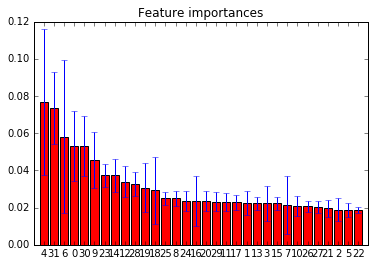

In [71]:
# Print the feature ranking
print("Feature ranking:")

for f in range(X_train.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X_train.shape[1]), indices)
plt.xlim([-1, X_train.shape[1]])
plt.show()

In [72]:
X_train, X_test, y_train, y_test = train_test_split(df2, y)
gbc = GradientBoostingClassifier(n_estimators=2000, max_depth=8, subsample=0.5, 
                                 max_features='auto', learning_rate=0.01)
gbc.fit(X_train, y_train)

GradientBoostingClassifier(init=None, learning_rate=0.01, loss='deviance',
              max_depth=8, max_features='auto', max_leaf_nodes=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=2000,
              presort='auto', random_state=None, subsample=0.5, verbose=0,
              warm_start=False)

In [73]:
roc_auc_score(y_test, gbc.predict_proba(X_test)[:, 1])

0.9337927557048199

In [74]:
with open("gbc_model_final.pkl", 'w') as f:
    pickle.dump(gbc, f)

In [75]:
with open("gbc_model.pkl") as f_un:
    model_unpickled = pickle.load(f_un)

In [76]:
roc_auc_score(y_test, model_unpickled.predict_proba(X_test)[:, 1])

0.96008699578844525

In [77]:
def roc_curve(probabilities, labels):
    '''
    INPUT: numpy array, numpy array
    OUTPUT: list, list, list

    Take a numpy array of the predicted probabilities and a numpy array of the
    true labels.
    Return the True Positive Rates, False Positive Rates and Thresholds for the
    ROC curve.
    '''

    thresholds = np.sort(probabilities)

    tprs = []
    fprs = []

    num_positive_cases = sum(labels)
    num_negative_cases = len(labels) - num_positive_cases

    for threshold in thresholds:
        # With this threshold, give the prediction of each instance
        predicted_positive = probabilities >= threshold
        # Calculate the number of correctly predicted positive cases
        true_positives = np.sum(predicted_positive * labels)
        # Calculate the number of incorrectly predicted positive cases
        false_positives = np.sum(predicted_positive) - true_positives
        # Calculate the True Positive Rate
        tpr = true_positives / float(num_positive_cases)
        # Calculate the False Positive Rate
        fpr = false_positives / float(num_negative_cases)

        fprs.append(fpr)
        tprs.append(tpr)
    
    return tprs, fprs, thresholds.tolist()

def plot_roc(probs, y_true, title, xlabel, ylabel):
    # ROC
    tpr, fpr, thresholds = roc_curve(v_probs, y_test)

    plt.hold(True)
    plt.plot(fpr, tpr)

    # 45 degree line
    xx = np.linspace(0, 1.0, 20)
    plt.plot(xx, xx, color='red')

    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)

    plt.show()

In [78]:
v_probs = model_unpickled.predict_proba(X_test)[:, 1]

/Users/HarryZhang/anaconda/lib/python2.7/site-packages/pandas/computation/expressions.py:190: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  unsupported[op_str]))


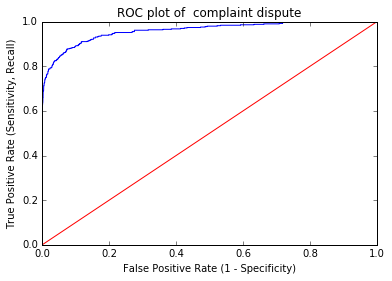

In [79]:
plot_roc(v_probs, y_test, "ROC plot of  complaint dispute", 
         "False Positive Rate (1 - Specificity)", "True Positive Rate (Sensitivity, Recall)")

In [80]:
import sklearn.metrics as skm
skm.roc_auc_score(y_test, v_probs)

0.96008699578844525

In [81]:
pd.crosstab(y_test, model_unpickled.predict(X_test))

col_0,False,True
acct_type,,
False,3086,8
True,161,330


In [82]:
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(model, X_test, y_true):
    cm = confusion_matrix(y_true, model.predict(X_test))

    print(cm)

    # Show confusion matrix in a separate window
    plt.matshow(cm)
    plt.title('Confusion matrix')
    plt.colorbar()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

[[3086    8]
 [ 161  330]]


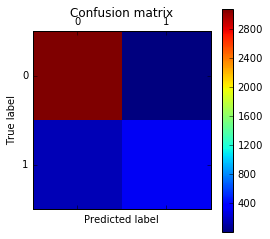

In [83]:
plot_confusion_matrix(model_unpickled, X_test, y_test)

In [84]:
import cPickle as pickle

with open("naivebayes.pkl", 'w') as f:
    pickle.dump(model, f)
with open("vectorizer.pkl", 'w') as f:
    pickle.dump(vectorizer, f)